# Exploratory Data Analysis
***

In [1]:
# Imports and environment 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer
from sklearn.svm import SVC

from scipy import stats

## 1. Overview

Load dataset:


In [2]:
df_train = pd.read_csv("../data/data_train.csv") # Train data
df_test = pd.read_csv("../data/data_test.csv") # Test data

### 1.1. Train Dataset

In [3]:
print(f"SHAPE\n{df_train.shape}\n")
print(df_train.info())

SHAPE
(202944, 25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202944 entries, 0 to 202943
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Id                    202944 non-null  int64
 1   HighBP                202944 non-null  int64
 2   HighChol              202944 non-null  int64
 3   CholCheck             202944 non-null  int64
 4   BMI                   202944 non-null  int64
 5   Smoker                202944 non-null  int64
 6   Stroke                202944 non-null  int64
 7   HeartDiseaseorAttack  202944 non-null  int64
 8   PhysActivity          202944 non-null  int64
 9   Fruits                202944 non-null  int64
 10  Veggies               202944 non-null  int64
 11  HvyAlcoholConsump     202944 non-null  int64
 12  AnyHealthcare         202944 non-null  int64
 13  NoDocbcCost           202944 non-null  int64
 14  GenHlth               202944 non-null  int64
 15  MentHlth      

In [4]:
print(f"\nTRAIN DATASET DESCRIBE")
df_train.describe()


TRAIN DATASET DESCRIBE


,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
count,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,...,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000
mean,101471.500000,0.428700,0.424344,0.962655,28.379824,0.442634,0.040844,0.094391,0.756302,0.635372,...,3.196971,4.256455,0.168707,0.439545,8.037449,5.050245,6.055641,-7.408660,-7.560041,0.175571
std,58585.030853,0.494891,0.494244,0.189607,6.612738,0.496700,0.197929,0.292372,0.429313,0.481327,...,7.427247,8.736665,0.374494,0.496333,3.051568,0.985601,2.070140,75.993743,75.927137,0.380455
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-199.000000,-199.000000,0.000000
25%,50735.750000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,-55.000000,-55.000000,0.000000
50%,101471.500000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000,0.000000,0.000000
75%,152207.250000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,40.000000,40.000000,0.000000
max,202943.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,199.000000,199.000000,1.000000


In [5]:
print(f"\nTRAIN DATASET HEAD")
df_train.head()


TRAIN DATASET HEAD


,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,0,0,0,1,24,1,0,0,1,0,...,0,0,0,0,8,4,5,60,0,0
1,1,0,0,1,28,0,0,0,1,1,...,1,0,0,0,2,6,8,0,-64,0
2,2,0,0,1,36,1,0,0,1,1,...,30,30,1,0,3,2,1,-46,0,0
3,3,0,1,1,35,0,0,0,1,1,...,0,0,0,0,8,6,8,-83,-188,0
4,4,0,1,1,27,0,0,0,1,0,...,0,0,0,0,9,5,4,-58,0,0


In [6]:
print(f"\nTRAIN DATASET MIN")
pd.DataFrame.min(df_train)


TRAIN DATASET MIN


Id                        0
HighBP                    0
HighChol                  0
CholCheck                 0
BMI                      12
Smoker                    0
Stroke                    0
HeartDiseaseorAttack      0
PhysActivity              0
Fruits                    0
Veggies                   0
HvyAlcoholConsump         0
AnyHealthcare             0
NoDocbcCost               0
GenHlth                   1
MentHlth                  0
PhysHlth                  0
DiffWalk                  0
Sex                       0
Age                       1
Education                 1
Income                    1
ExtraMedTest           -199
ExtraAlcoholTest       -199
Status                    0
dtype: int64

In [7]:
print(f"\nTRAIN DATASET MAX")
pd.DataFrame.max(df_train)


TRAIN DATASET MAX


Id                      202943
HighBP                       1
HighChol                     1
CholCheck                    1
BMI                         98
Smoker                       1
Stroke                       1
HeartDiseaseorAttack         1
PhysActivity                 1
Fruits                       1
Veggies                      1
HvyAlcoholConsump            1
AnyHealthcare                1
NoDocbcCost                  1
GenHlth                      5
MentHlth                    30
PhysHlth                    30
DiffWalk                     1
Sex                          1
Age                         13
Education                    6
Income                       8
ExtraMedTest               199
ExtraAlcoholTest           199
Status                       1
dtype: int64

In [8]:
print(f"\nTRAIN DATASET MEDIAN")
pd.DataFrame.median(df_train)


TRAIN DATASET MEDIAN


Id                      101471.5
HighBP                       0.0
HighChol                     0.0
CholCheck                    1.0
BMI                         27.0
Smoker                       0.0
Stroke                       0.0
HeartDiseaseorAttack         0.0
PhysActivity                 1.0
Fruits                       1.0
Veggies                      1.0
HvyAlcoholConsump            0.0
AnyHealthcare                1.0
NoDocbcCost                  0.0
GenHlth                      2.0
MentHlth                     0.0
PhysHlth                     0.0
DiffWalk                     0.0
Sex                          0.0
Age                          8.0
Education                    5.0
Income                       7.0
ExtraMedTest                 0.0
ExtraAlcoholTest             0.0
Status                       0.0
dtype: float64

In [9]:
print(f"\nTRAIN DATASET MEAN")
pd.DataFrame.mean(df_train)


TRAIN DATASET MEAN


Id                      101471.500000
HighBP                       0.428700
HighChol                     0.424344
CholCheck                    0.962655
BMI                         28.379824
Smoker                       0.442634
Stroke                       0.040844
HeartDiseaseorAttack         0.094391
PhysActivity                 0.756302
Fruits                       0.635372
Veggies                      0.811519
HvyAlcoholConsump            0.055912
AnyHealthcare                0.951543
NoDocbcCost                  0.083693
GenHlth                      2.514024
MentHlth                     3.196971
PhysHlth                     4.256455
DiffWalk                     0.168707
Sex                          0.439545
Age                          8.037449
Education                    5.050245
Income                       6.055641
ExtraMedTest                -7.408660
ExtraAlcoholTest            -7.560041
Status                       0.175571
dtype: float64

We will not be using `Id` field, which has no relation to patients’ condition and therefore is not attributes.

In [10]:
df_train = df_train.drop(columns=['Id'])
df_test = df_test.drop(columns=['Id'])

We will check if `Id` columns has dropped yet

In [11]:
print(f"\n{('TRAIN DATASET HEAD')}")
df_train.head()


TRAIN DATASET HEAD


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,0,0,1,24,1,0,0,1,0,1,...,0,0,0,0,8,4,5,60,0,0
1,0,0,1,28,0,0,0,1,1,1,...,1,0,0,0,2,6,8,0,-64,0
2,0,0,1,36,1,0,0,1,1,0,...,30,30,1,0,3,2,1,-46,0,0
3,0,1,1,35,0,0,0,1,1,1,...,0,0,0,0,8,6,8,-83,-188,0
4,0,1,1,27,0,0,0,1,0,1,...,0,0,0,0,9,5,4,-58,0,0


### 1.3 Observation
The target we are trying to predict is the status of `diabetes` (Presence or Absence) development in 
patients

The features we will be using to predict the status are:. 

| Features | Data Type | Description | Range | Source | 
| :------- | :-------- | :---------- | :-----| :-----:| 
| HighBP | int | High blood preasure ($mmHg$) | -Normal: 90/60mmHg and 120/80<br/> -At risk of HighBP: 120/80 and 140/90<br/> -HighBP: 140/90 and 160/100 | [BHF](https://www.bhf.org.uk/informationsupport/risk-factors/high-blood-pressure#whyimportant)
| HighChol | int | High cholesterol ($mg/dL$) | -Normal: Under 200<br/> -At risk of High Choleterol: 200-239<br/> -High Cholesterol: 240 and higher<br/> | [Cleaveland Clinic](https://my.clevelandclinic.org/health/articles/11920-cholesterol-numbers-what-do-they-mean)
| CholCheck | int | Cholestero check in 5 years |
| BMI | int | Body Mass Index ($BMI$) | -Normal: 18.5-24.9 <br/> -Overweight: 25.0-29.9 <br/> -Obesity: 30 and above | [CDC](https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html)
| Smoker | int | Amount of Cigarettes patient had consumed ($5 packs = 100 cigarettes$) |
| Stroke | int | Have patients ever they had a stroke? |
| HeartDiseaseorAttack | int | coronary heart disease (CHD) or myocardial infarction (MI) |
| PhysActivity | int | Physical activity in past 30 days - not including jobs |
| Fruits | int | Consume Fruit 1 or more times per day | 
| Veggies | int | Consume Vegetables 1 or more times per day |
| HvyAlcoholConsump | int | Heavy drinkers (Adult men more than 14 drinks per week, Adult women more than 7 drinks per week)|
| AnyHealthcare | int | Any kind of health care coverage (health insurance, prepaid plans such as HMO, etc.) |
| NoDocbcCost | int | No Doctor met due to Cost |
| GenHlth | int | Patient's health in general | 
| MentHlth | int | Patients' Metal Health in the past 30 days |
| PhysHlth | int | Patients' Physical Health in the past 30 days| 
| DiffWalk | int| Difficulty walking or climbing |
| Sex | int | Patient's sex |
| Age | int| Patient's age ($years$) |
| Education | int | Patient's Education level ($levels$) | 
| Income | int | Patient's income level ($levels$) |
| ExtraMedTest | int | The result of extra medical test ($range$) |
| ExtraAlcoholTest | int | The result of extra alcohol test ($range$) | 

***
## 2. Data Distribution

### 2.1 Overview
We will observe the data distribution by creating histograms, boxplots, and correlation matrixs for each column in our datasets (only non-binary columns will be analyze because we want to check for any outliers first). Later on, the test and train dataset will be analyze and comparare together, including categorical columns. 

#### 2.1.1 Train Dataset

#### Train Histogram Plot:

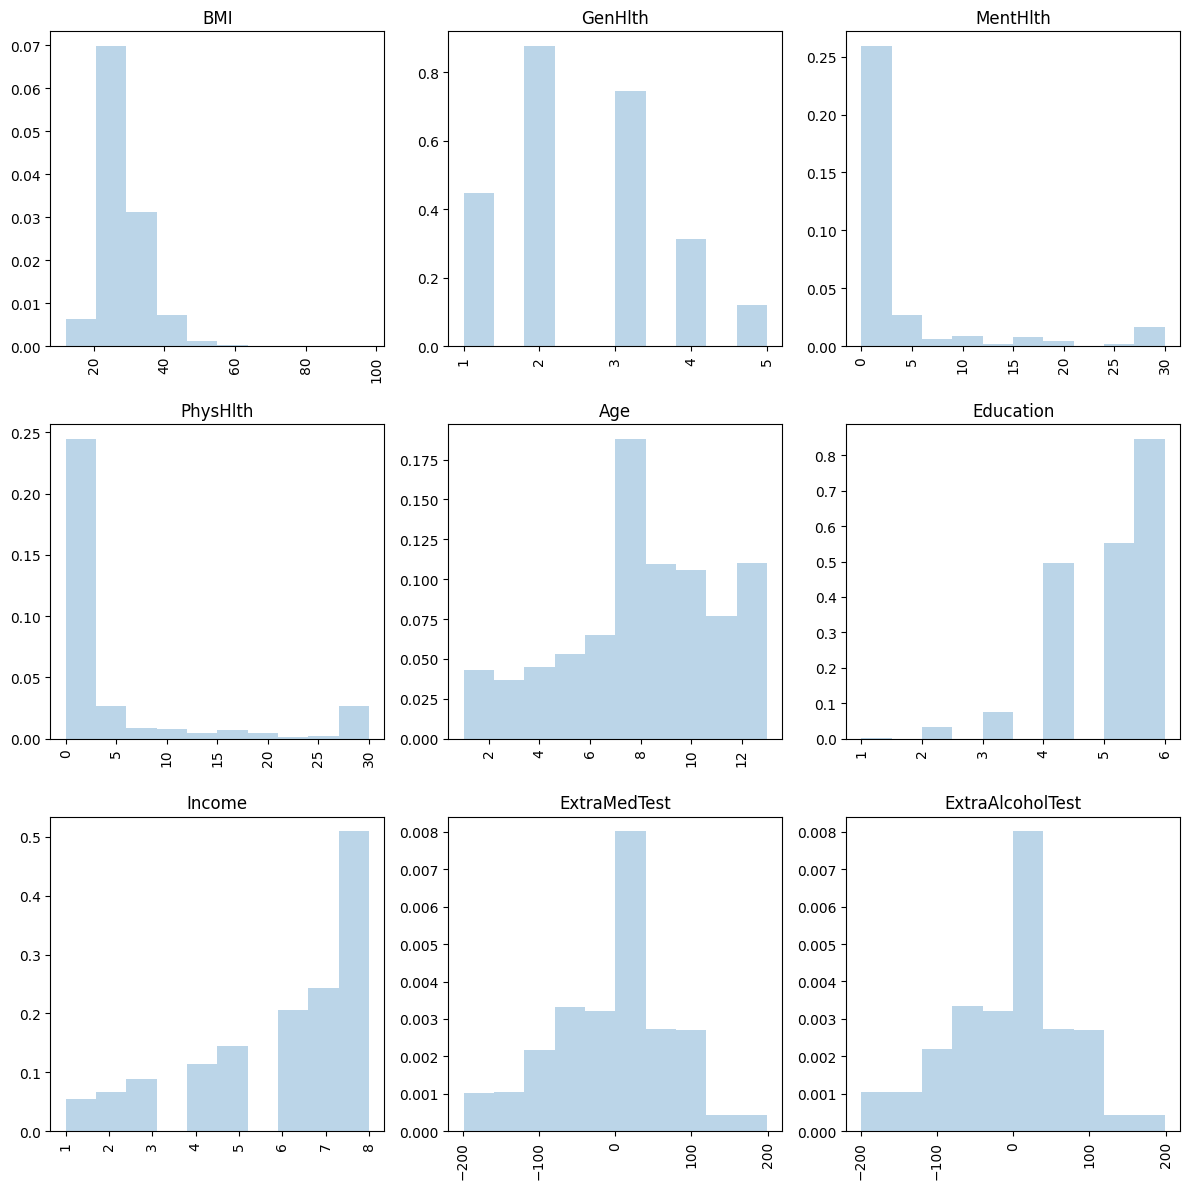

In [12]:
non_binary_cols = df_train.columns[(df_train.nunique() > 2)]

plt.figure(figsize=(12, 12))
for i, col in enumerate(non_binary_cols):
    plt.subplot(3, 3, i+1)
    plt.hist(df_train[col], alpha=0.3, color='tab:blue', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

#### Train Boxplot 

C:\Users\Admin\AppData\Local\Temp\ipykernel_138520\3043218683.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


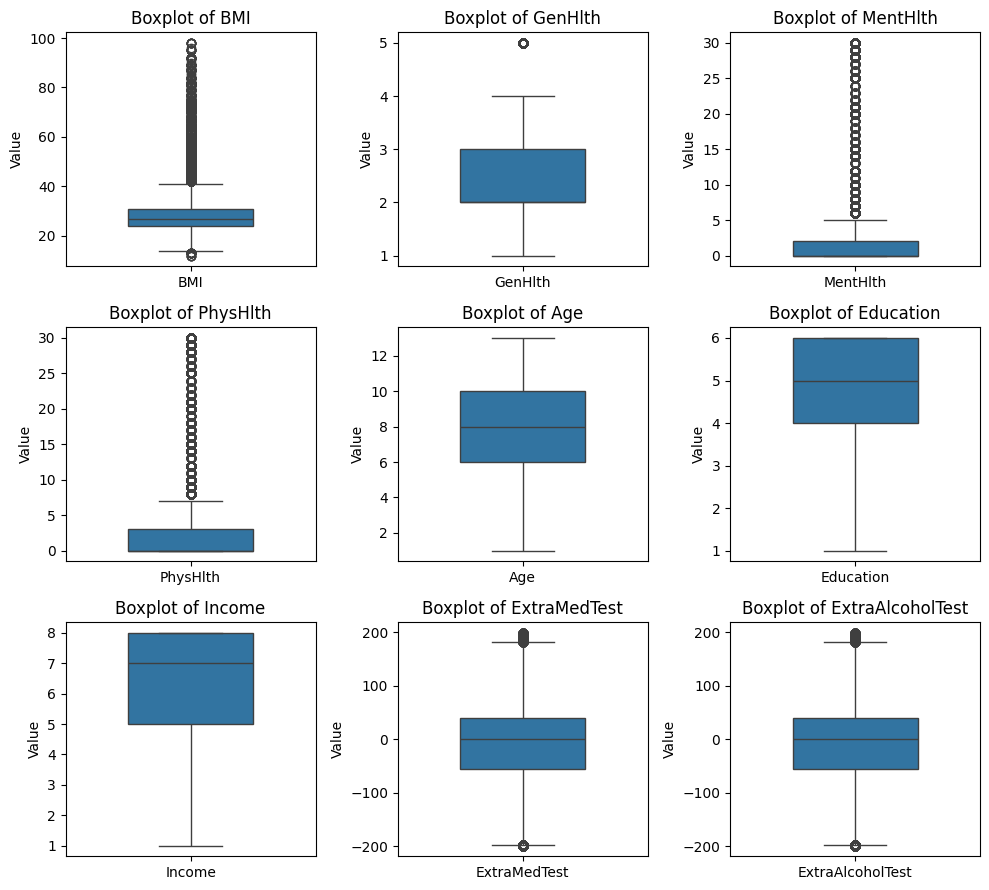

In [13]:
non_binary_cols = df_train.columns[(df_train.nunique() > 2)]
num_cols = min(len(non_binary_cols), 3)
num_rows = (len(non_binary_cols) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3*num_rows), constrained_layout=True)
axes = axes.flatten()

for i, column in enumerate(non_binary_cols):
    ax = axes[i]
    sns.boxplot(data=df_train[[column]], ax=ax, color='tab:blue', width=0.5)
    ax.set_ylabel("Value")
    ax.set_title(f"Boxplot of {column}")

for i in range(len(non_binary_cols), len(axes)):
    axes[i].remove()

plt.tight_layout()
plt.show()

### 2.2 Comparision between train and test dataset

C:\Users\Admin\AppData\Local\Temp\ipykernel_138520\1412457657.py:20: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


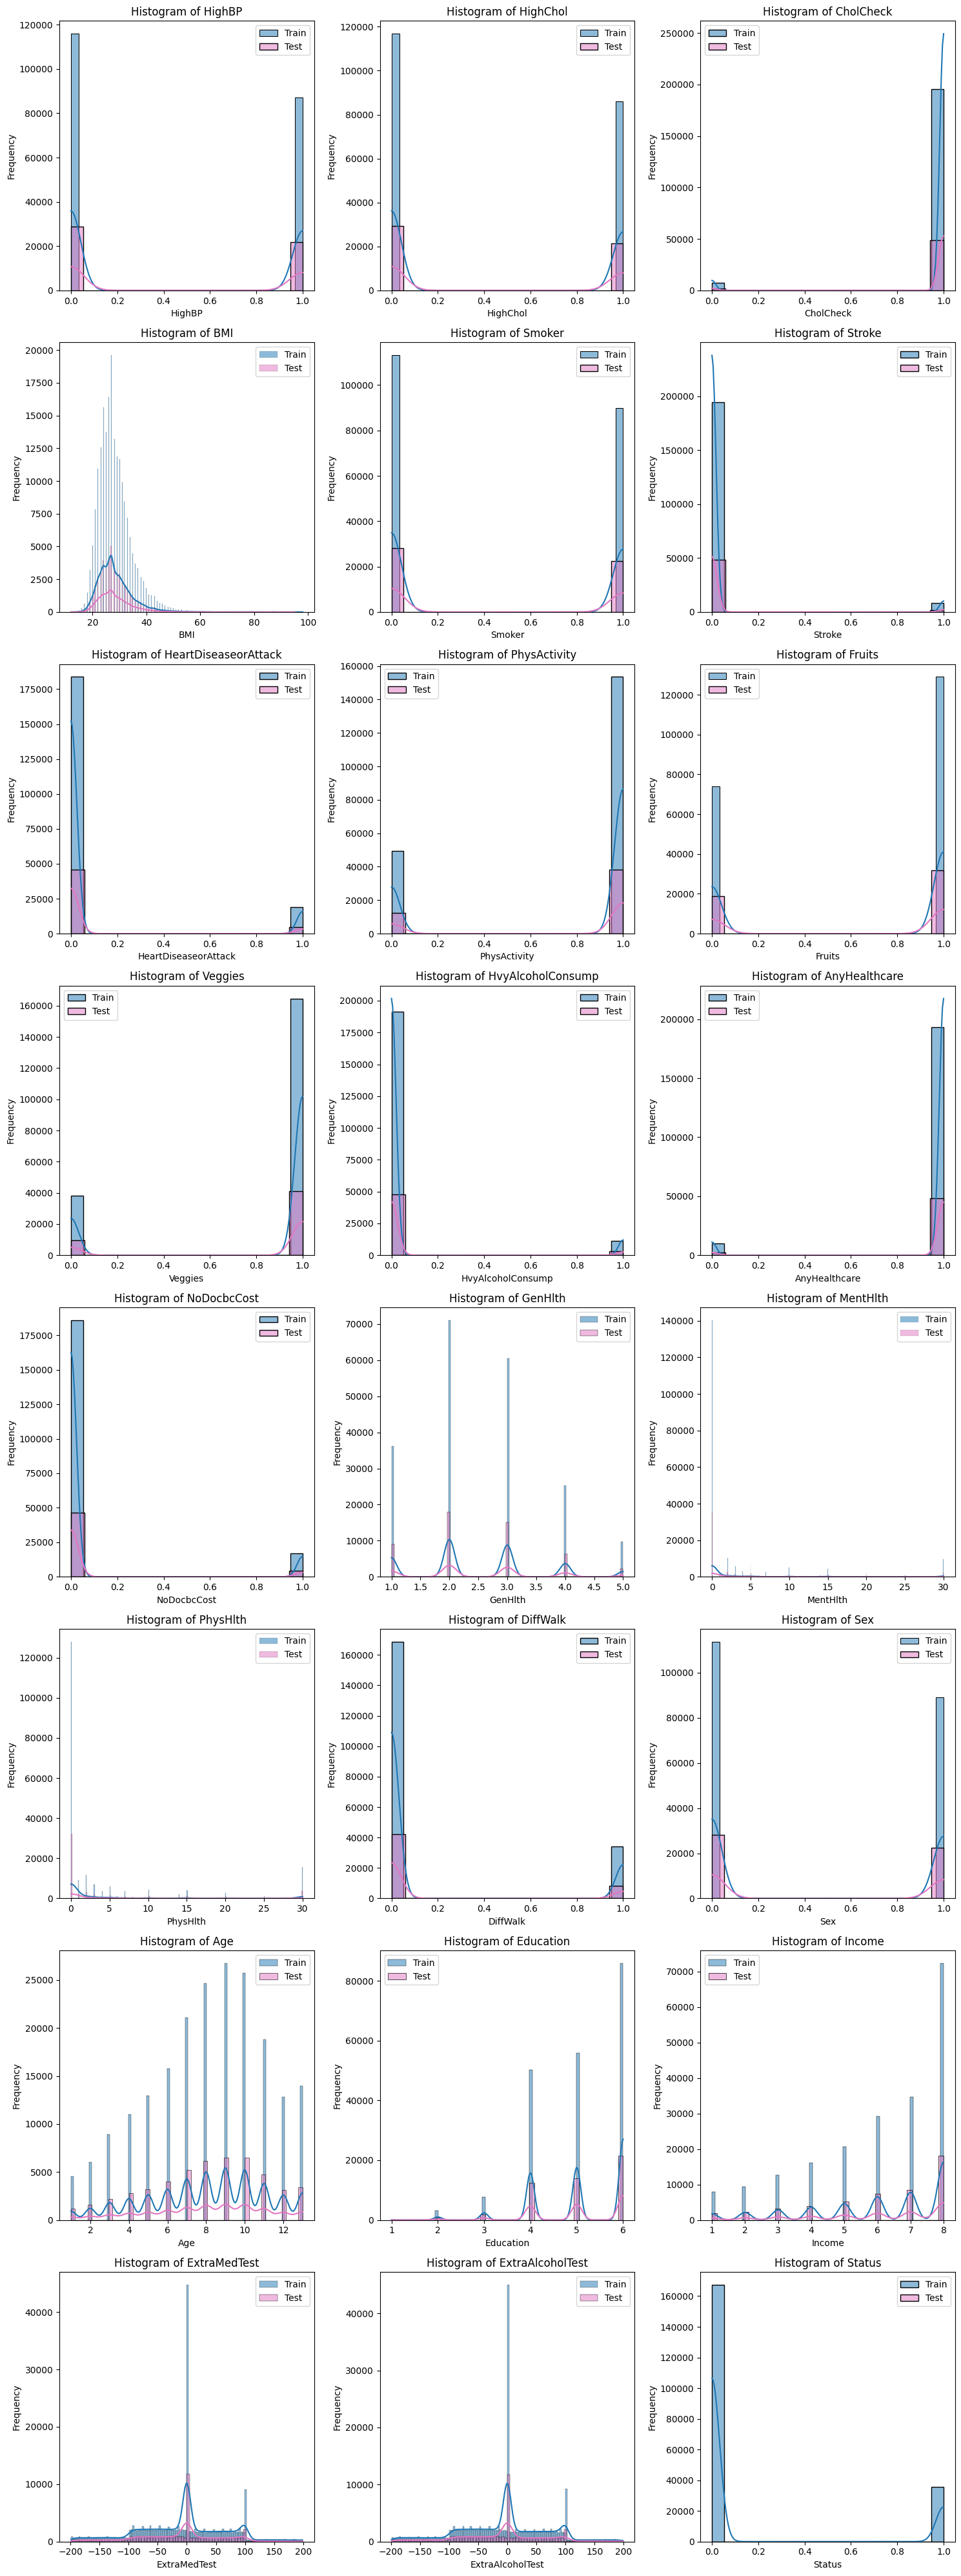

In [14]:
num_features = len(df_train.columns)
num_cols = min(num_features, 3)
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows), constrained_layout=True)
axes = axes.flatten()

for i, column in enumerate(df_train.columns):
    ax = axes[i]
    sns.histplot(data=df_train, x=column, ax=ax, color='tab:blue', alpha=0.5, label='Train', kde=True)
    sns.histplot(data=df_test, x=column, ax=ax, color='tab:pink', alpha=0.5, label='Test', kde=True)
    ax.set_title(f"Histogram of {column}")
    ax.set_ylabel("Frequency")
    ax.set_xlabel(column)
    ax.legend()

for i in range(num_features, len(axes)):
    axes[i].remove()

plt.tight_layout()
plt.show()


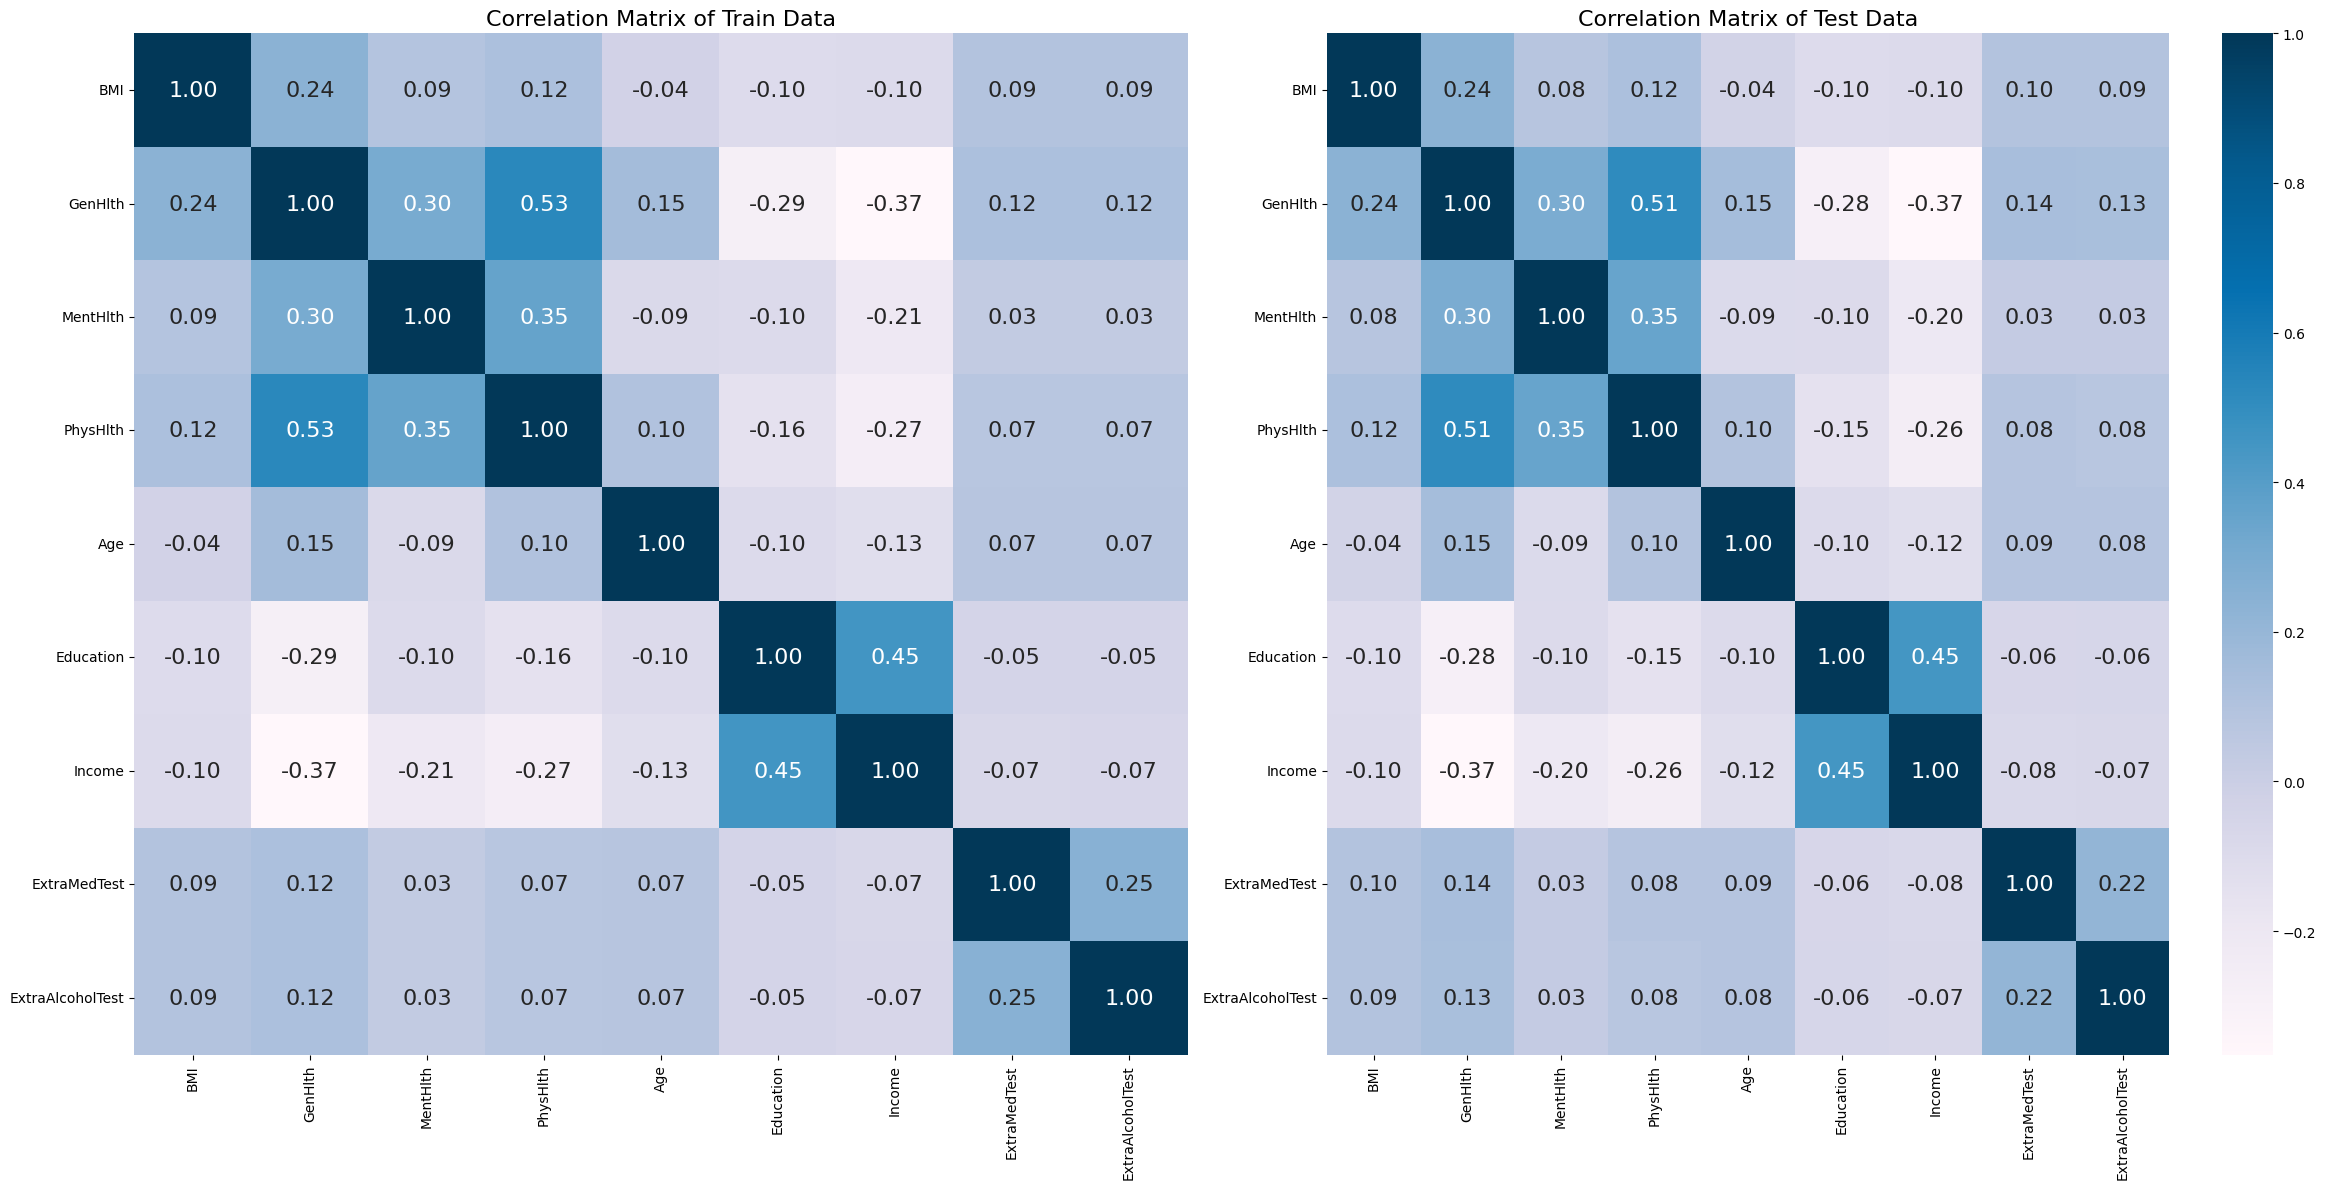

In [15]:
non_binary_cols = [col for col in df_train.columns if df_train[col].nunique() > 2]

train_corr = df_train[non_binary_cols].corr()
test_corr = df_test[non_binary_cols].corr()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(24, 12))

sns.heatmap(train_corr, annot=True, fmt=".2f", cmap='PuBu', ax=ax1, cbar=False, annot_kws={"size": 16})
ax1.set_title("Correlation Matrix of Train Data", fontsize=16)

sns.heatmap(test_corr, annot=True, fmt=".2f", cmap='PuBu', ax=ax2, annot_kws={"size": 16})
ax2.set_title("Correlation Matrix of Test Data", fontsize=16)

plt.tight_layout()
plt.show()

***
## 3. Data Processing

#### 3.1 Check missing values
We will check for `NA` values to see if there is any missing values in the dataset 


In [16]:
pd.isna(df_train).sum()

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
ExtraMedTest            0
ExtraAlcoholTest        0
Status                  0
dtype: int64

It seems like there is no missing values (`NaN`) nor any error values, therefore we now can continue to `Data Processing`

#### 3.2 BaseLine Model

We want to separate the features `X` and target `Y` first.

In [17]:
df_X = df_train.drop(["Status"], axis=1)
df_Y = df_train[["Status"]]

In [18]:
display(df_X.head())
display(df_Y.head())

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest
0,0,0,1,24,1,0,0,1,0,1,...,2,0,0,0,0,8,4,5,60,0
1,0,0,1,28,0,0,0,1,1,1,...,1,1,0,0,0,2,6,8,0,-64
2,0,0,1,36,1,0,0,1,1,0,...,3,30,30,1,0,3,2,1,-46,0
3,0,1,1,35,0,0,0,1,1,1,...,3,0,0,0,0,8,6,8,-83,-188
4,0,1,1,27,0,0,0,1,0,1,...,3,0,0,0,0,9,5,4,-58,0


,Status
0,0
1,0
2,0
3,0
4,0


Splitting the Train dataset to `Train` and `Test` dataset

In [19]:
train_X, test_X, train_Y, test_Y = train_test_split(df_X, df_Y, shuffle=True, random_state=0, test_size=0.2)

train_y = train_Y.values
test_Y = test_Y.values

print(f"train_X shape: {train_X.shape}")
print(f"train_Y shape: {train_Y.shape}")
print(f"test_X shape: {test_X.shape}")
print(f"test_Y shape: {test_Y.shape}")

train_X shape: (162355, 23)
train_Y shape: (162355, 1)
test_X shape: (40589, 23)
test_Y shape: (40589, 1)


In [20]:
baseline_clf = LogisticRegression(
    penalty=None, class_weight="balanced", max_iter=1_000, random_state=99)

baseline_clf.fit(train_X, train_y.ravel())
pred_y = baseline_clf.predict(test_X)

In [21]:
baseline_performance_report = classification_report(test_Y, pred_y)
print(f"Classification Report:\n{baseline_performance_report}")

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93     33494
           1       0.62      0.88      0.73      7095

    accuracy                           0.88     40589
   macro avg       0.80      0.88      0.83     40589
weighted avg       0.91      0.88      0.89     40589



This is still not optimal for our objectives, we want it to predict both classes equally well, or the `Positive` class predict better. Therefore, we still need to improve this with more `Data Processing`.

#### 3.2 Outliers
First we will check to see which `non-binary` columns in our dataset has outliers

In [22]:
def print_outliers(df):
    # Select non-binary columns
    non_binary_cols = [col for col in df.columns if df[col].nunique() > 2]
    df = df[non_binary_cols]

    # Calculate the IQR for each column
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers using the IQR method
    threshold = 1.5
    iqr_outliers = df[((df < (Q1 - threshold * IQR)) | (df > (Q3 + threshold * IQR))).any(axis=1)]

    # Print the IQR outliers
    print("IQR Outliers:")
    print(iqr_outliers)

# Use the function on your DataFrame
print_outliers(df_train)

IQR Outliers:
        BMI  GenHlth  MentHlth  PhysHlth  Age  Education  Income  \
2        36        3        30        30    3          2       1   
10       23        4        30        20    6          6       7   
14       26        5         6        24   11          5       7   
15       31        4        10        20   10          5       7   
19       46        3         2         0    7          4       6   
...     ...      ...       ...       ...  ...        ...     ...   
202924   28        2         0        30    9          6       8   
202928   21        4         0        30    8          5       8   
202932   20        2        20         0    6          4       8   
202939   29        3        10         2    8          6       7   
202942   22        2         0        14    9          6       7   

        ExtraMedTest  ExtraAlcoholTest  
2                -46                 0  
10               -82                 0  
14              -161                11  
15   

We had identify that the above `non-binary` columns has `outliers`, now we need to cap them using `IQR` method to set limits.

In [23]:
outlier = [col for col in df_train.columns if df_train[col].nunique() > 2]

# Create a KNN imputer object
imputer = KNNImputer(n_neighbors=100)

# Process outliers in df_train
df_train[outlier] = imputer.fit_transform(df_train[outlier])


# Calculate the IQR for each feature
Q1 = df_train[outlier].quantile(0.25)
Q3 = df_train[outlier].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for capping outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers
df_train[outlier] = df_train[outlier].clip(lower_bound, upper_bound, axis=1)

Double-check if we missed any `outliers`

In [24]:
def print_outliers(df):
    # Select non-binary columns
    non_binary_cols = [col for col in df.columns if df[col].nunique() > 2]
    df = df[non_binary_cols]

    # Calculate the IQR for each column
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers using the IQR method
    threshold = 1.5
    iqr_outliers = df[((df < (Q1 - threshold * IQR)) | (df > (Q3 + threshold * IQR))).any(axis=1)]

    # Print the IQR outliers
    print("IQR Outliers:")
    print(iqr_outliers)

# Use the function on your DataFrame
print_outliers(df_train)

IQR Outliers:
Empty DataFrame
Columns: [BMI, GenHlth, MentHlth, PhysHlth, Age, Education, Income, ExtraMedTest, ExtraAlcoholTest]
Index: []


C:\Users\Admin\AppData\Local\Temp\ipykernel_138520\3043218683.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


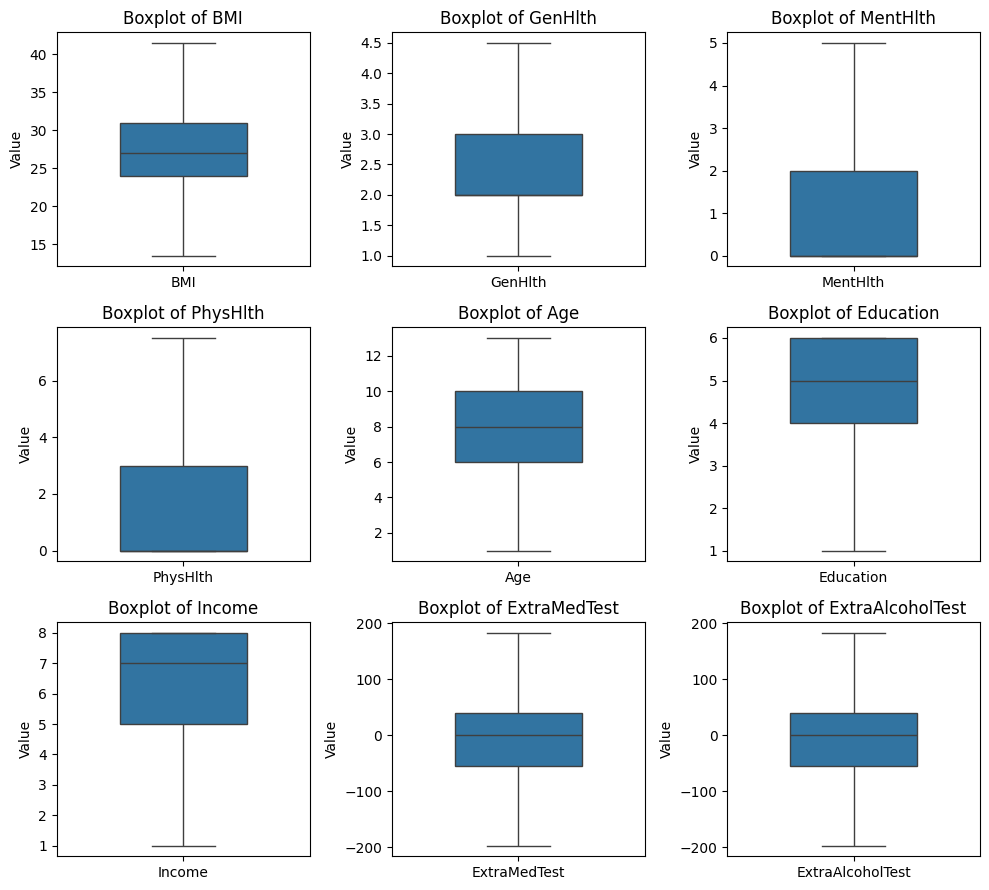

In [25]:
non_binary_cols = df_train.columns[(df_train.nunique() > 2)]
num_cols = min(len(non_binary_cols), 3)
num_rows = (len(non_binary_cols) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3*num_rows), constrained_layout=True)
axes = axes.flatten()

for i, column in enumerate(non_binary_cols):
    ax = axes[i]
    sns.boxplot(data=df_train[[column]], ax=ax, color='tab:blue', width=0.5)
    ax.set_ylabel("Value")
    ax.set_title(f"Boxplot of {column}")

for i in range(len(non_binary_cols), len(axes)):
    axes[i].remove()

plt.tight_layout()
plt.show()

#### 3.3 Data Transformation

Generate `validation` set. Split the data into 60% new training set and 20% validation. 

In [26]:
train_X, val_X, train_Y, val_Y = train_test_split(train_X, train_Y, test_size=0.25,shuffle=True )
print(train_X.shape)
print(val_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(val_Y.shape)
print(test_Y .shape)

(121766, 23)
(40589, 23)
(40589, 23)
(121766, 1)
(40589, 1)
(40589, 1)


We need to do a `Min-Max normalisation` before using polynomial features.

In [27]:
scaler = MinMaxScaler()
scaler.fit(train_X)

train_X = scaler.transform(train_X)
val_X = scaler.transform(val_X)
test_X = scaler.transform(test_X)

## 4. Model Development

#### 4.2 Polynomial degress of 2

In [32]:
poly = PolynomialFeatures(2)
poly.fit(train_X)
train_X = poly.transform(train_X)
test_X = poly.transform(test_X)
val_X = poly.transform(val_X)

In [33]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, penalty=None, solver='saga', 
                         max_iter=1000, 
                        class_weight='balanced')

In [34]:
clf.fit(train_X, train_Y.to_numpy().ravel())

LogisticRegression(class_weight='balanced', max_iter=1000, penalty=None,
                   random_state=0, solver='saga')

In [35]:
train_pred = clf.predict(train_X)
train_f1 = f1_score(train_Y, train_pred, average='macro')

print("Train F1-Score score: {:.3f}".format(train_f1))

Train F1-Score score: 0.844


In [36]:
val_pred = clf.predict(val_X)
val_f1 = f1_score(val_Y, val_pred, average='macro')

print("Validation F1-Score score: {:.3f}".format(val_f1))

Validation F1-Score score: 0.846


#### 4.3 Logistic Regression 

In [37]:
lambda_paras = np.logspace(-5, 1, num=25)    # establish the lambda values to test (grid)
# Then search
train_performace = list()
valid_performace = list()
for lambda_para in lambda_paras:
    clf = LogisticRegression(penalty='l2', C = 1.0/lambda_para, 
                             random_state=0, solver='saga', max_iter=300 , 
                             class_weight='balanced')   #create a classifier with a different lambda value
    
    clf.fit(train_X, train_Y.to_numpy().ravel())        #train the classifier
    
    train_pred = clf.predict(train_X)
    train_f1 = f1_score(train_Y, train_pred, average='macro')   #calculate the train f1-score
    
    val_pred = clf.predict(val_X)
    val_f1 = f1_score(val_Y, val_pred, average='macro')         #calculate the validation f1-score
    
    train_performace.append(train_f1)
    valid_performace.append(val_f1)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

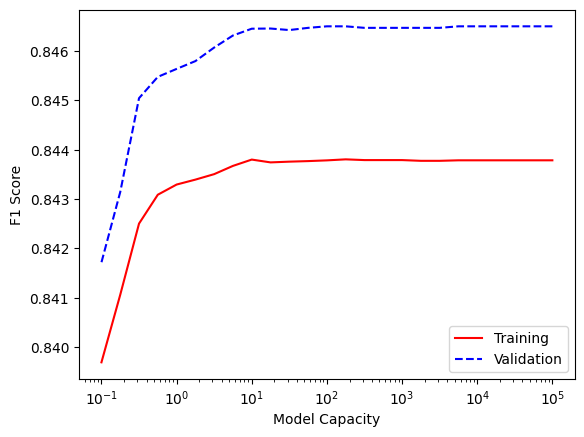

In [38]:
plt.plot([1.0/lambda_para for lambda_para in lambda_paras], 
         [tp for tp in train_performace], 'r-')
plt.plot([1.0/lambda_para for lambda_para in lambda_paras], 
         [vp for vp in valid_performace], 'b--')
plt.xscale("log")
plt.ylabel('F1 Score')
plt.xlabel('Model Capacity')
plt.legend(['Training','Validation'])
plt.show()

In [39]:
clf = LogisticRegression(penalty='l2', C = 1, 
                             random_state=0, solver='liblinear', max_iter=200 , 
                             class_weight='balanced')   #create a classifier with a different lambda value
    
clf.fit(train_X, train_Y.to_numpy().ravel())        #train the classifier
    
train_pred = clf.predict(train_X)
train_f1 = f1_score(train_Y, train_pred, average='macro')   #calculate the train f1-score
    
val_pred = clf.predict(val_X)
val_f1 = f1_score(val_Y, val_pred, average='macro')         #calculate the validation f1-score
    
print("Train F1-Score score: {:.3f}".format(train_f1))
print("Validation F1-Score score: {:.3f}".format(val_f1))


Train F1-Score score: 0.843
Validation F1-Score score: 0.846


In [40]:
from sklearn.metrics import classification_report

test_pred = clf.predict(test_X)
    
print(classification_report(test_Y, test_pred,))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94     33494
           1       0.66      0.88      0.75      7095

    accuracy                           0.90     40589
   macro avg       0.82      0.89      0.85     40589
weighted avg       0.92      0.90      0.91     40589



#### 4.4 K-Fold Cross validation

In [41]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, make_scorer

f1_scorer = make_scorer(f1_score, average='weighted')
lambda_paras = np.logspace(-10, 2, num=5)

cv_results = dict()

for lambda_para in lambda_paras:
    clf = LogisticRegression(penalty='l2', C = 1.0/lambda_para, 
                             solver='liblinear', max_iter=300, 
                             class_weight='balanced')
    
    scores = cross_validate(clf, train_X, train_Y.to_numpy().ravel(), 
                            scoring=f1_scorer, return_estimator=True,
                            return_train_score=True, cv=5)
    
    cv_results[lambda_para] = scores

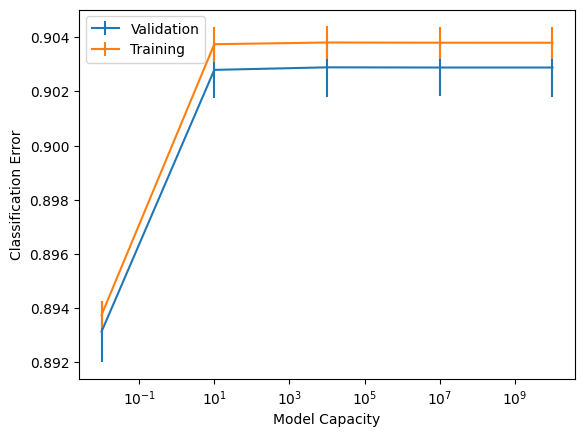

In [42]:
fig, ax = plt.subplots()

val_means = [np.mean(cv_results[lambda_para]['test_score']) 
             for lambda_para in lambda_paras]

val_std = [np.std(cv_results[lambda_para]['test_score']) 
           for lambda_para in lambda_paras]

train_means = [np.mean(cv_results[lambda_para]['train_score']) 
               for lambda_para in lambda_paras]

train_std = [np.std(cv_results[lambda_para]['train_score']) 
             for lambda_para in lambda_paras]

ax.errorbar([1.0/lambda_para for lambda_para in lambda_paras], 
            val_means,
            yerr=val_std)

ax.errorbar([1.0/lambda_para for lambda_para in lambda_paras], 
            train_means,
            yerr=train_std)

plt.xscale("log")
plt.ylabel('Classification Error')
plt.xlabel('Model Capacity')
plt.legend(['Validation','Training',])
plt.show()

#### 4.4 Decision Tree

In [43]:
train_data_X_, test_data_X, train_data_y_ , test_data_y = train_test_split(df_X, df_Y, test_size=0.2, 
                                              shuffle=True,random_state=0)
    
train_data_X, val_data_X, train_data_y, val_data_y = train_test_split(train_data_X_, train_data_y_, test_size=0.25, 
                                            shuffle=True,random_state=0)
    
print(train_data_X.shape, val_data_X.shape, test_data_X.shape)

(121766, 23) (40589, 23) (40589, 23)


In [44]:
train_x = train_data_X.to_numpy()
train_y = train_data_y

val_x = val_data_X.to_numpy()
val_y = val_data_y

test_x = test_data_X.to_numpy()
test_y = test_data_y

In [45]:
import graphviz 

def get_tree_2_plot(clf):
    class_names = ['0', '1']  # replace with your actual class names
    dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=df_X.columns,  
                      class_names=class_names,
                      filled=True, rounded=True,  
                      special_characters=True)  
    graph = graphviz.Source(dot_data) 
    return graph

In [46]:
from sklearn.metrics import f1_score

def get_acc_scores(clf, train_x, train_y, val_x, val_y):
    train_pred = clf.predict(train_x)
    val_pred = clf.predict(val_x)
    
    train_acc = f1_score(train_y, train_pred, average='macro')
    val_acc = f1_score(val_y, val_pred, average='macro')
    
    return train_acc, val_acc

In [47]:
from sklearn import tree

tree_max_depth = 2   #change this value and observe

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=tree_max_depth, class_weight='balanced')
clf = clf.fit(train_x, train_y)

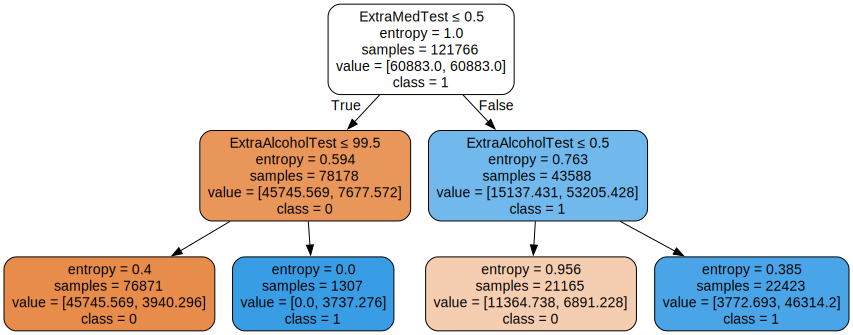

In [48]:
Dtree = get_tree_2_plot(clf)
Dtree

In [49]:
# Now you can compute the F1 score without encountering a ValueError
train_acc, val_acc = get_acc_scores(clf, train_x, train_y, val_x, val_y)
print("Train F1-Score score: {:.3f}".format(train_acc))
print("Validation F1-Score score: {:.3f}".format(val_acc))

Train F1-Score score: 0.864
Validation F1-Score score: 0.868


It seems like by using `Decision Tree` increase our `Train` and `Validation` F1-Score from 0.845 and 0.844 to 0.864 and 0.868 respectively.

#### 4.5 Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=8, n_estimators=500, class_weight='balanced_subsample', random_state=0)
clf.fit(train_X, train_Y)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced_subsample', max_depth=8,
                       n_estimators=500, random_state=0)

In [51]:
from sklearn.metrics import f1_score

def get_acc_scores(clf, train_X, train_Y, val_X, val_Y):
    train_pred = clf.predict(train_X)
    val_pred = clf.predict(val_X)
    
    train_acc = f1_score(train_Y, train_pred, average='macro')
    val_acc = f1_score(val_Y, val_pred, average='macro')
    
    return train_acc, val_acc

In [52]:
train_acc, val_acc = get_acc_scores(clf, train_X, train_Y, val_X, val_Y)
print("Train Accuracy score: {:.3f}".format(train_acc))
print("Validation Accuracy score: {:.3f}".format(val_acc))

Train Accuracy score: 0.905
Validation Accuracy score: 0.904
